In [1]:
# Import necessary libraries and modules
import csv  # For reading and writing CSV files
import matplotlib.pyplot as plt  # For plotting and data visualization
import xml.etree.ElementTree as et  # For XML parsing
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For structured data manipulation
from datetime import datetime as dt  # For handling date and time operations

In [2]:
# Parse the XML file named "OptaCityF24.xml"
tree = et.ElementTree(file="OptaCityF24.xml")

# Get the root element of the XML tree (top-most element in the XML structure)
games = tree.getroot()

In [3]:
# Retrieve the first child element of the root (i.e., 'games')
match_details = games[0].attrib

# Display or inspect the attributes dictionary of the first child element
match_details

{'id': '360481',
 'away_team_id': '43',
 'away_team_name': 'Manchester City',
 'competition_id': '8',
 'competition_name': 'English Barclays Premier League',
 'game_date': '2011-08-21T16:00:00',
 'home_team_id': '30',
 'home_team_name': 'Bolton Wanderers',
 'matchday': '2',
 'period_1_start': '2011-08-21T16:00:38',
 'period_2_start': '2011-08-21T17:03:47',
 'season_id': '2011',
 'season_name': 'Season 2011/2012'}

In [4]:
# Parse the XML file named "OptaCityF7.xml" and create an ElementTree object
tree2 = et.ElementTree(file="OptaCityF7.xml")

# Get the root element of the newly created XML tree (tree2)
soccerfeed = tree2.getroot()

In [5]:
# Initialize empty lists to store player IDs and names
player_ids = []
player_names = []

# Loop through each child element in the XML root ('soccerfeed')
for child in soccerfeed:
    # Loop through each grandchild element of the current child
    for grchild in child:
        # Check if the grandchild's tag is "Team"
        if grchild.tag == "Team":
            # Loop through each child element of "Team"
            for grgrchild in grchild:
                # Check if the tag is "Player" for further processing
                if grgrchild.tag == "Player":
                    # Extract the player's ID, remove any leading 'p' character, and add to the player_ids list
                    player_ids.append(grgrchild.attrib["uID"].lstrip('p'))
                    
                    # Assume the first child's text is the first name and the last child's text is the last name
                    # Combine them and append to the player_names list
                    for grgrgrchild in grgrchild:
                        player_names.append(grgrgrchild[0].text + " " + grgrgrchild[-1].text)

# Create a dictionary mapping player IDs to their names
player_dict = dict(zip(player_ids, player_names))

# Display the resulting dictionary (useful in interactive environments)
player_dict

{'1344': 'Jussi Jääskeläinen',
 '19419': 'Gary Cahill',
 '28183': 'Grétar Steinsson',
 '2004': 'Paul Robinson',
 '1587': 'Zat Knight',
 '18428': 'Chris Eagles',
 '27696': 'Fabrice Muamba',
 '14668': 'Nigel Reo-Coker',
 '10089': 'Martin Petrov',
 '9765': 'Ivan Klasnic',
 '3630': 'Kevin Davies',
 '15188': 'Darren Pratley',
 '105088': 'Adam Blakeman',
 '19958': 'David Wheater',
 '82263': 'Marcos Alonso',
 '1615': 'Robbie Blake',
 '19930': 'Mark Davies',
 '45175': 'Adam Bogdan',
 '15749': 'Joe Hart',
 '20492': 'Micah Richards',
 '17476': 'Vincent Kompany',
 '42593': 'Aleksandar Kolarov',
 '7551': 'Joleon Lescott',
 '1632': 'Gareth Barry',
 '15157': 'James Milner',
 '14664': 'Gnegneri Yaya Touré',
 '20664': 'David Silva',
 '42544': 'Edin Dzeko',
 '37572': 'Sergio Agüero',
 '20658': 'Pablo Zabaleta',
 '17336': 'Gaël Clichy',
 '42493': 'Mario Balotelli',
 '20312': 'Carlos Tévez',
 '65807': 'Stefan Savic',
 '19959': 'Adam Johnson',
 '56827': 'Costel Pantilimon'}

In [6]:
# Print the match details: home team vs away team, followed by competition and season details.
# Extract the home team name, away team name, competition name and the season name

print ("%s v %s, %s %s" % (match_details["home_team_name"],
                          match_details["away_team_name"],
                          match_details["competition_name"][8:],
                          match_details["season_name"][7:]))

# Convert the game_date from the match_details dictionary from ISO format to a human-readable date.
# Print the formatted date.
print ("Date: %s" % dt.strftime(dt.strptime(match_details["game_date"], '%Y-%m-%dT%H:%M:%S'),
                               "%A %d %B %Y"))

# Convert the game_date from the match_details dictionary to retrieve the kick-off time.
# Print the formatted kick-off time in 12-hour format, removing any leading "0" if present.
print ("Kick-off: %s" % dt.strftime(dt.strptime(match_details["game_date"], '%Y-%m-%dT%H:%M:%S'),
                                   "%I%p").lstrip("0"))

Bolton Wanderers v Manchester City, Barclays Premier League 2011/2012
Date: Sunday 21 August 2011
Kick-off: 4PM


In [7]:
# Construct a dictionary (`team_dict`) mapping team IDs to their respective team names.
# Use the home team ID as a key for the home team's name, and the away team ID as a key for the away team's name.
team_dict = {match_details["home_team_id"]: match_details["home_team_name"],
             match_details["away_team_id"]: match_details["away_team_name"]}

print (team_dict)

{'30': 'Bolton Wanderers', '43': 'Manchester City'}


In [8]:
# Lists to hold various details of shots.
shot_name = []
shot_x = []
shot_y = []
shot_min = []
shot_sec = []
shot_period = []
shot_team = []
shot_play = []
shot_player = []

# Dictionary to translate shot type IDs to descriptive names.
shot_dict = {'13': 'Shot off target',
             '14': 'Post',
             '15': 'Shot saved',
             '16': 'Goal'}

# Dictionary to translate play situation IDs to descriptive names.
shot_play_dict = {'22': 'regular play',
                  '23': 'fast break',
                  '24': 'set piece',
                  '25': 'from corner',
                  '26': 'free kick',
                  '96': 'corner situation',
                  '112': 'scramble',
                  '160': 'throw-in set piece'}

# Iterate over all games.
for game in games:
    # Iterate over each event in the current game.
    for event in game:
        # Check if the event is of the type 'Shot off target', 'Post', or 'Goal'.
        if event.attrib.get("type_id") in ['13', '14', '16']:
            # Append respective attributes for the shot to lists.
            shot_name.append(shot_dict[event.attrib.get("type_id")])
            shot_x.append(event.attrib.get("x"))
            shot_y.append(event.attrib.get("y"))
            shot_min.append(event.attrib.get("min"))
            shot_sec.append(event.attrib.get("sec"))
            shot_period.append(event.attrib.get("period_id"))
            shot_team.append(team_dict[event.attrib.get("team_id")])
            shot_player.append(player_dict[event.attrib.get("player_id")])
            
            # Loop through qualifiers to find the play situation of the shot and add to the shot play dict if theres a match.
            for q in event:
                qualifier = q.attrib.get("qualifier_id")
                if qualifier in shot_play_dict.keys():
                    shot_play.append(shot_play_dict[qualifier])
                                   
        # Check if the event is of the type 'Shot saved'.
        if event.attrib.get("type_id") == '15':
            # Append respective attributes for the shot to lists.
            shot_name.append(shot_dict[event.attrib.get("type_id")])
            shot_x.append(event.attrib.get("x"))
            shot_y.append(event.attrib.get("y"))
            shot_min.append(event.attrib.get("min"))
            shot_sec.append(event.attrib.get("sec"))
            shot_period.append(event.attrib.get("period_id"))
            shot_team.append(team_dict[event.attrib.get("team_id")])
            shot_player.append(player_dict[event.attrib.get("player_id")])
            
            # Loop through qualifiers to find the play situation of the shot and add to the shot play dict if theres a match.
            for q in event:
                qualifier = q.attrib.get("qualifier_id")
                if qualifier in shot_play_dict.keys():
                    shot_play.append(shot_play_dict[qualifier])
                               
# Convert the individual lists into a structured 2D array.
shot_df = np.array(list(zip(shot_team, shot_player, shot_period, shot_min, shot_sec, shot_play, shot_name, shot_x, shot_y)))
    
# Display the structured data.
print(shot_df)

# Define column headers for exporting to CSV.
shot_fieldnames = ["team", "player", "period", "min", "sec", "shot play", "shot type", "x", "y"]

# Write the structured data to a CSV file, naming it based on teams participating.
with open("city_shot_data_%s_%s.csv" % (match_details["home_team_name"], match_details["away_team_name"]), "w",newline='') as city_shot_csv:
    csv_file = csv.writer(city_shot_csv)
    csv_file.writerow(shot_fieldnames)
    for i in range(len(shot_df)):
        csv_file.writerow(shot_df[i])

[['Bolton Wanderers' 'Chris Eagles' '1' '2' '59' 'free kick' 'Shot saved'
  '75.9' '66.6']
 ['Bolton Wanderers' 'Zat Knight' '1' '10' '3' 'from corner'
  'Shot off target' '87.3' '41.4']
 ['Bolton Wanderers' 'Kevin Davies' '1' '10' '39' 'regular play'
  'Shot saved' '93.0' '54.8']
 ['Manchester City' 'James Milner' '1' '14' '39' 'regular play'
  'Shot saved' '96.1' '52.5']
 ['Manchester City' 'David Silva' '1' '16' '26' 'regular play'
  'Shot saved' '81.2' '27.6']
 ['Manchester City' 'Sergio Agüero' '1' '17' '52' 'regular play'
  'Shot off target' '92.7' '56.4']
 ['Bolton Wanderers' 'Chris Eagles' '1' '21' '14' 'set piece'
  'Shot saved' '79.0' '30.1']
 ['Manchester City' 'Sergio Agüero' '1' '24' '43' 'regular play'
  'Shot saved' '89.8' '24.3']
 ['Manchester City' 'David Silva' '1' '25' '14' 'throw-in set piece'
  'Goal' '78.4' '38.2']
 ['Manchester City' 'Sergio Agüero' '1' '34' '56' 'regular play'
  'Shot off target' '92.8' '48.0']
 ['Manchester City' 'Gareth Barry' '1' '36' '59' 'f

In [9]:
#Create a list of our columns/lists
column_titles = ["team", "player", "period", "min", "sec", "shot play", "shot type", "x", "y"]
            
final_table = pd.DataFrame(data=[shot_team, shot_player, shot_period, shot_min, shot_sec, shot_play, shot_name, shot_x, shot_y], index=column_titles).T

# Create a list of shot plays to exclude since we only want data from open play
exclude_shot_plays = ["free kick", "from corner", "set piece"]

# Filter the DataFrame to exclude rows with those shot plays
final_table = final_table[~final_table['shot play'].isin(exclude_shot_plays)]

#Show us the top 30 rows
final_table.head(30)

,team,player,period,min,sec,shot play,shot type,x,y
2,Bolton Wanderers,Kevin Davies,1,10,39,regular play,Shot saved,93.0,54.8
3,Manchester City,James Milner,1,14,39,regular play,Shot saved,96.1,52.5
4,Manchester City,David Silva,1,16,26,regular play,Shot saved,81.2,27.6
5,Manchester City,Sergio Agüero,1,17,52,regular play,Shot off target,92.7,56.4
7,Manchester City,Sergio Agüero,1,24,43,regular play,Shot saved,89.8,24.3
8,Manchester City,David Silva,1,25,14,throw-in set piece,Goal,78.4,38.2
9,Manchester City,Sergio Agüero,1,34,56,regular play,Shot off target,92.8,48.0
11,Bolton Wanderers,Ivan Klasnic,1,38,54,regular play,Goal,91.4,57.3
12,Manchester City,Edin Dzeko,2,46,39,regular play,Goal,90.6,34.7
13,Manchester City,James Milner,2,49,18,regular play,Shot saved,79.3,65.9


In [10]:
# Importing the ConvexHull function from the scipy.spatial module. 
# This function is used to compute the convex hull of a set of points.
from scipy.spatial import ConvexHull

# Importing the pandas library, which offers data structures and 
import pandas as pd

# Importing the numpy library, which provides support for working 
import numpy as np

# Importing the matplotlib library, a plotting library for the Python 
import matplotlib.pyplot as plt

# Importing the Arc function from matplotlib.patches module, 
# which is used for drawing arc shapes in plots.
from matplotlib.patches import Arc

# This line is a Jupyter Notebook magic command. It configures 
# the notebook to display plots inline, immediately below the 
# code cell that produced it.
%matplotlib inline

In [11]:
# # Reading data from the CSV file "city_shot_data.csv" into a DataFrame named 'shot_table_data'
city_shot_table_data = pd.read_csv("city_shot_data.csv")

# Displaying the first 5 rows of the 'shot_table_data' DataFrame for a quick overview
city_shot_table_data.head()

,Player,Team,Period,Min,Sec,Shot Play,Shot Type,Shot X,Shot Y
0,Chris Eagles,Bolton Wanderers,1,2,59,regular play,Shot saved,75.9,66.6
1,Zat Knight,Bolton Wanderers,1,10,3,regular play,Shot off target,87.3,41.4
2,Kevin Davies,Bolton Wanderers,1,10,39,regular play,Shot saved,93.0,54.8
3,James Milner,Manchester City,1,14,39,regular play,Shot saved,96.1,52.5
4,David Silva,Manchester City,1,16,26,regular play,Shot saved,81.2,27.6


In [12]:
# Using the 'loc' method to filter rows in the 'city_shot_table_data' DataFrame 
# where the 'Player' column matches the value 'David Silva'.
# The resulting subset of data is stored in the 'David_Silva_Data' DataFrame.

David_Silva_Data = city_shot_table_data.loc[city_shot_table_data['Player'] == 'David Silva']

David_Silva_Data.head()

,Player,Team,Period,Min,Sec,Shot Play,Shot Type,Shot X,Shot Y
4,David Silva,Manchester City,1,16,26,regular play,Shot saved,81.2,27.6
8,David Silva,Manchester City,1,25,14,regular play,Goal,78.4,38.2
20,David Silva,Manchester City,2,68,41,NaN,Shot saved,92.7,56.7


In [13]:
# Selecting only the 'Shot X' and 'Shot Y' columns from the 'David_Silva_Data' DataFrame.
# The resulting values are converted into a NumPy array, which is stored in the 'shot_points' variable.

shot_points = David_Silva_Data[['Shot X', 'Shot Y']].values

shot_points

array([[81.2, 27.6],
       [78.4, 38.2],
       [92.7, 56.7]])

In [14]:
# Using the ConvexHull function from the scipy.spatial module to compute the convex hull 
# of the shot points (X and Y coordinates) of David Silva. 
# The resulting convex hull object is stored in the 'hull' variable.

hull = ConvexHull(David_Silva_Data[['Shot X', 'Shot Y']])

hull

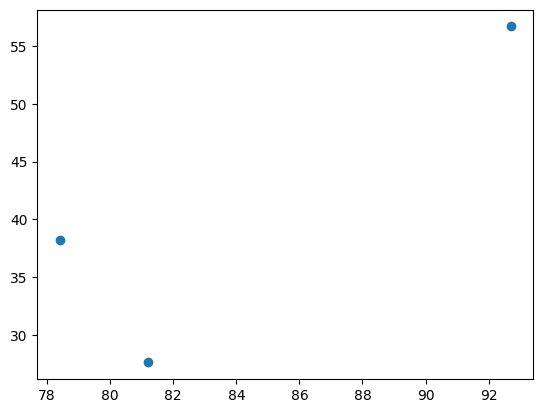

In [15]:
# Using the 'plot' function from the matplotlib library to visualize the shot points 
# of David Silva. The 'o' argument specifies that the points should be represented as circles.
# The X-coordinates come from the 'Shot X' column and the Y-coordinates from the 'Shot Y' column 
# of the 'David_Silva_Data' DataFrame.

plt.plot(David_Silva_Data['Shot X'], David_Silva_Data['Shot Y'], "o")

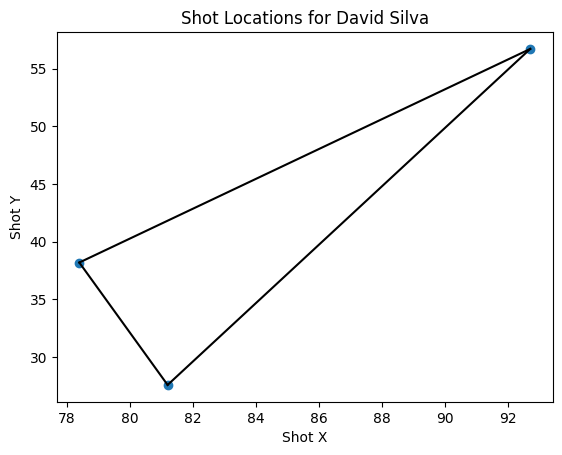

In [16]:
plt.plot(David_Silva_Data['Shot X'], David_Silva_Data['Shot Y'], "o")


# Looping through the simplices of the convex hull. 
# A simplex in the context of the ConvexHull object can be thought of as an edge (in 2D).
for simplex in hull.simplices:
    #Draw a black line between each
    plt.plot(David_Silva_Data.iloc[simplex]['Shot X'], David_Silva_Data.iloc[simplex]['Shot Y'], 'k-')
    
# Plot and Axis Title
plt.title("Shot Locations for David Silva")
plt.xlabel("Shot X")
plt.ylabel("Shot Y")


plt.show()

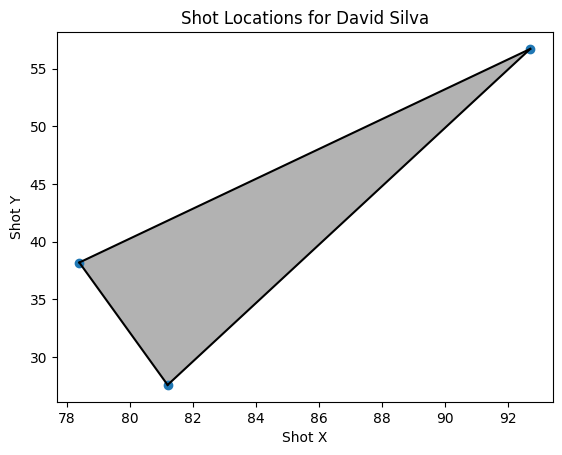

In [17]:
plt.plot(David_Silva_Data['Shot X'], David_Silva_Data['Shot Y'], "o")

for simplex in hull.simplices:
    #Draw a black line between each
    plt.plot(David_Silva_Data.iloc[simplex]['Shot X'], David_Silva_Data.iloc[simplex]['Shot Y'], 'k-')
    

plt.title("Shot Locations for David Silva")
plt.xlabel("Shot X")
plt.ylabel("Shot Y")


#Fill the area within the lines that we have drawn
plt.fill(David_Silva_Data.iloc[hull.vertices]['Shot X'], David_Silva_Data.iloc[hull.vertices]['Shot Y'], 'k', alpha=0.3)

plt.show()

In [18]:
# Using the 'shot_table_data' DataFrame, filter out rows where the 'Team' column value is 'Manchester City'.
# From the filtered data, select the 'Player' column and extract unique player names.
# The resulting array of unique player names is stored in the 'players' variable.
players = city_shot_table_data[city_shot_table_data['Team'] == 'Manchester City']["Player"].unique()

# Displaying the unique player names of 'Manchester City' for inspection.
print(players)

['James Milner' 'David Silva' 'Sergio Agüero' 'Gareth Barry' 'Edin Dzeko'
 'Aleksandar Kolarov' 'Gnegneri Yaya Touré' 'Adam Johnson' 'Carlos Tévez']


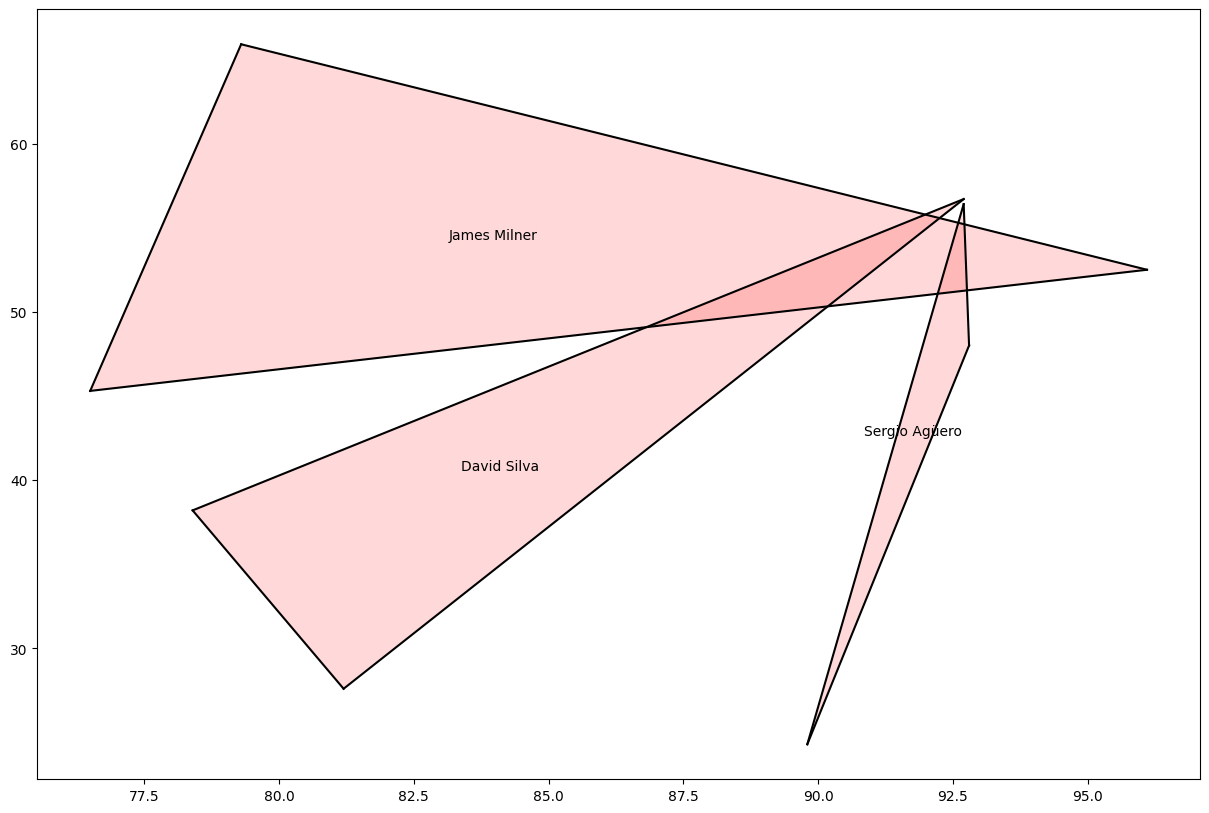

In [19]:
# Set the size of the plot to 15 units wide by 10 units tall
plt.figure(figsize=(15, 10))

# Loop through each unique player in the 'players' list
for Player in players:
    
    # Filter the 'city_shot_table_data' DataFrame to get shots taken by the current player from Manchester City
    # and store this in a new DataFrame named 'df'
    df = city_shot_table_data[(city_shot_table_data['Team'] == 'Manchester City') & (city_shot_table_data['Player'] == Player)]
    
    # Extract the shot coordinates (X and Y values) from the 'df' DataFrame and store them in the 'points' array
    points = df[['Shot X', 'Shot Y']].values
    
    # Ensure there are at least 3 shot points for the current player (requirement for constructing a convex hull)
    if len(points) >= 3:
        try:
            # Construct a convex hull for the shot points
            hull = ConvexHull(points)
            
            # Loop through each edge (simplex) of the convex hull
            for simplex in hull.simplices:
                # Plot each edge of the convex hull as a black line
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
                
                # Fill the area inside the convex hull with a slightly transparent red color (5% opacity)
                plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'red', alpha=0.05)
            
            # Calculate the centroid (center point) of the convex hull
            cx = np.mean(points[hull.vertices, 0])
            cy = np.mean(points[hull.vertices, 1])
            
            # Display the player's name at the centroid of their respective convex hull
            plt.text(cx, cy, Player, color='black', ha='center', va='center')
            
        except:
            # If there's an exception (error) while processing the convex hull for a player, skip to the next player
            pass
      
# Display the completed plot
plt.show()

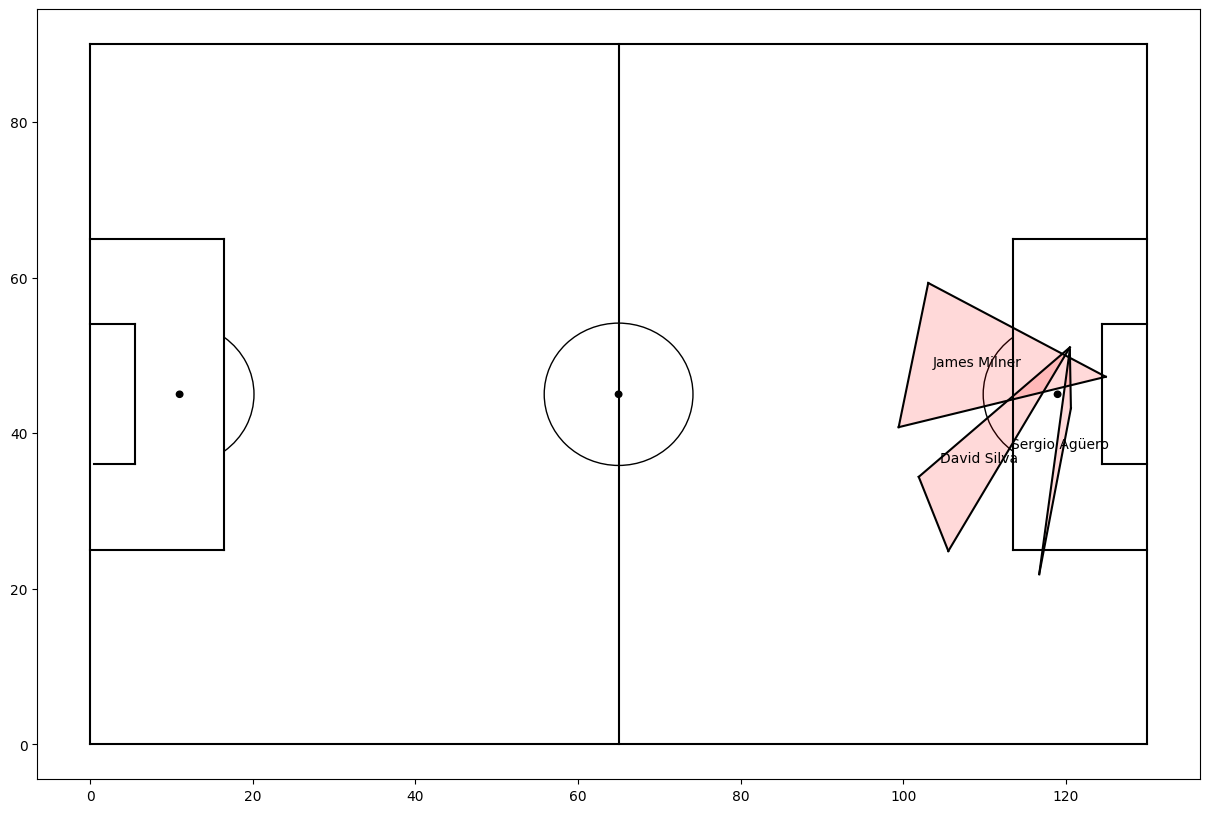

In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
from scipy.spatial import ConvexHull

# Define a function to create a soccer pitch visualization
def createPitch(ax):

    #Pitch Outline & Centre Line
    # Creating the boundary and center line of the pitch
    ax.plot([0,0],[0,90], color="black")
    ax.plot([0,130],[90,90], color="black")
    ax.plot([130,130],[90,0], color="black")
    ax.plot([130,0],[0,0], color="black")
    ax.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    # Creating the left penalty box
    ax.plot([16.5,16.5],[65,25],color="black")
    ax.plot([0,16.5],[65,65],color="black")
    ax.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    # Creating the right penalty box
    ax.plot([130,113.5],[65,65],color="black")
    ax.plot([113.5,113.5],[65,25],color="black")
    ax.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    # Creating the left 6-yard box
    ax.plot([0,5.5],[54,54],color="black")
    ax.plot([5.5,5.5],[54,36],color="black")
    ax.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    # Creating the right 6-yard box
    ax.plot([130,124.5],[54,54],color="black")
    ax.plot([124.5,124.5],[54,36],color="black")
    ax.plot([124.5,130],[36,36],color="black")
    
    # Creating circles in the middle and penalty spots
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.4,color="black")
    leftPenSpot = plt.Circle((11,45),0.4,color="black")
    rightPenSpot = plt.Circle((119,45),0.4,color="black")
    
    # Adding the circles to the plot
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    # Creating arcs for the penalty areas
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=307,theta2=53,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=127,theta2=233,color="black")

    # Adding the arcs to the plot
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    

# Scaling factors to convert shot data coordinates to the pitch's coordinate system since the pitch has a 130x90 dimension compared to 100x100 for the plot points
scale_x = 130/100
scale_y = 90/100

# Creating the main plot with the pitch's size set
fig, ax = plt.subplots(figsize=(15, 10))
createPitch(ax)


#Merging the two codes, ie. the pitch and the convex hull we created prior to this

# Iterating over each player
for Player in players:
    
    # Extracting shot data for the specific player
    df = city_shot_table_data[(city_shot_table_data['Team'] == 'Manchester City') & (city_shot_table_data['Player'] == Player)].copy()  # Ensure the data slice is independent with .copy()
    
    # Scaling shot coordinates to match the pitch's dimensions
    df.loc[:, 'Scaled X'] = df['Shot X'] * scale_x
    df.loc[:, 'Scaled Y'] = df['Shot Y'] * scale_y
    
    # Extracting the scaled shot coordinates
    points = df[['Scaled X', 'Scaled Y']].values
    
    # Checking if there are enough shot points for creating a convex hull (minimum 3 required)
    if len(points) >= 3:
        try:
            # Creating a convex hull from the shot points
            hull = ConvexHull(points)
            
            # Drawing the convex hull and filling it with a slightly transparent red
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'k-')
                ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'red', alpha=0.05)
            
            # Calculating the centroid of the convex hull to label the player's name
            cx = np.mean(points[hull.vertices, 0])
            cy = np.mean(points[hull.vertices, 1])
            ax.text(cx, cy, Player, color='black', ha='center', va='center')
            
        except:
            # Skip the player if there's an error creating the convex hull
            pass

<IPython.core.display.Javascript object>


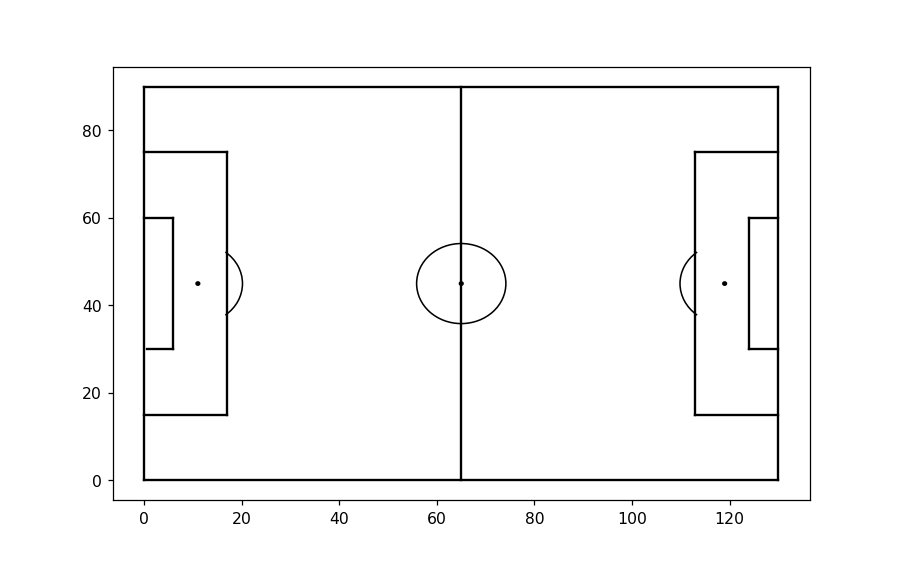

In [23]:
# Use the notebook backend for interactive plotting in Jupyter Notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define a function to create a visualization of a soccer pitch
def createPitch():
    # Initialize the figure and axis objects with specified size
    fig, ax = plt.subplots(figsize=(8,5))

    # Draw the pitch outline and centre line
    ax.plot([0,0],[0,90], color="black")          # Left sideline
    ax.plot([0,130],[90,90], color="black")       # Top end line
    ax.plot([130,130],[90,0], color="black")      # Right sideline
    ax.plot([130,0],[0,0], color="black")         # Bottom end line
    ax.plot([65,65],[0,90], color="black")        # Centre line

    # Draw the penalty areas and goals
    ax.plot([17,17],[75,15],color="black")        # Left penalty area vertical
    ax.plot([0,17],[75,75],color="black")         # Left penalty area top horizontal
    ax.plot([17,0],[15,15],color="black")         # Left penalty area bottom horizontal
    ax.plot([130,113],[75,75],color="black")      # Right penalty area top horizontal
    ax.plot([113,113],[75,15],color="black")      # Right penalty area vertical
    ax.plot([113,130],[15,15],color="black")      # Right penalty area bottom horizontal

    # Draw the 6-yard boxes
    ax.plot([0,6],[60,60],color="black")          # Left 6-yard box top horizontal
    ax.plot([6,6],[60,30],color="black")          # Left 6-yard box vertical
    ax.plot([6,0.5],[30,30],color="black")        # Left 6-yard box bottom horizontal
    ax.plot([130,124],[60,60],color="black")      # Right 6-yard box top horizontal
    ax.plot([124,124],[60,30],color="black")      # Right 6-yard box vertical
    ax.plot([124,130],[30,30],color="black")      # Right 6-yard box bottom horizontal

    # Create and add circles for the center of the pitch and the penalty spots
    centreCircle = plt.Circle((65,45), 9.15, color="black", fill=False)  # Centre circle
    centreSpot = plt.Circle((65,45), 0.37, color="black")                # Centre spot
    leftPenSpot = plt.Circle((11,45), 0.37, color="black")               # Left penalty spot
    rightPenSpot = plt.Circle((119,45), 0.37, color="black")             # Right penalty spot
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    # Create and add arcs near the penalty areas (D-shaped regions)
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color="black")   # Left arc
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color="black") # Right arc
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    # Return the figure and axis objects for further customization or display
    return fig, ax

# Call the createPitch function and generate the soccer pitch visualization
fig, ax = createPitch()

Text(value='', description='Player Name:')

Text(value='', description='Player Team:')

Text(value='', description='Opposition:')

IntText(value=0, description='Mins Played:')

IntText(value=0, description='Shot Min:')

FloatText(value=0.0, description='xG:')

FloatText(value=0.0, description='xGOT:')

Checkbox(value=False, description='SoT:')

Checkbox(value=False, description='Goal:')

Button(description='Submit Shot to Dataset', style=ButtonStyle())

Button(description='Undo Last Shot', style=ButtonStyle())

<IPython.core.display.Javascript object>


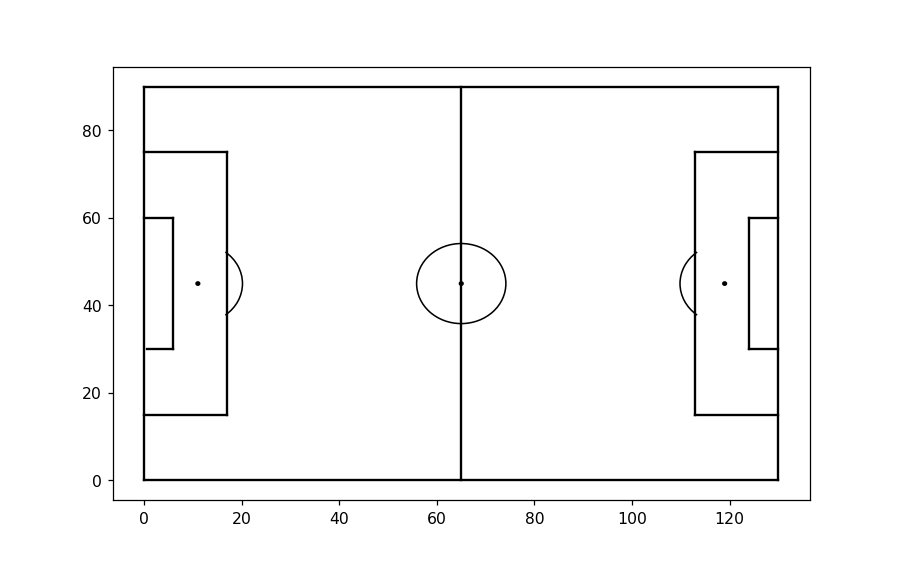

In [24]:
%matplotlib notebook
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load existing data or create a new DataFrame
filename = 'PlayerShotsData.csv'
try:
    df = pd.read_csv(filename)
except FileNotFoundError:
    df = pd.DataFrame(columns=['Player_Name', 'Player_Team', 'Opposition', 'Mins_Played', 'Shot_Min', 'xG', 'xGOT', 'SoT', 'Goal', 'Shot_X', 'Shot_Y'])

# Create widgets for input
player_name = widgets.Text(value='', description='Player Name:')
player_team = widgets.Text(value='', description='Player Team:')
opposition = widgets.Text(value='', description='Opposition:')
mins_played = widgets.IntText(description='Mins Played:')
shot_min = widgets.IntText(description='Shot Min:')
xg = widgets.FloatText(description='xG:')
xgot = widgets.FloatText(description='xGOT:')
sot = widgets.Checkbox(value=False, description='SoT:')
goal = widgets.Checkbox(value=False, description='Goal:')
submit_button = widgets.Button(description='Submit Shot to Dataset')
undo_button = widgets.Button(description='Undo Last Shot')  # The undo button

# Display the widgets
display(player_name, player_team, opposition, mins_played, shot_min, xg, xgot, sot, goal, submit_button, undo_button)

# Shot coordinates placeholder
shot_x = None
shot_y = None
# Store scatter plots for easy access
scatters = []

def onclick(event):
    global shot_x, shot_y, scatters
    # Store the clicked coordinates
    shot_x = event.xdata
    shot_y = event.ydata
    print(f"Shot coordinates: X = {shot_x:.2f}, Y = {shot_y:.2f}")
    
    # Plot the point where the user clicked
    scatter = ax.scatter(shot_x, shot_y, color='red', s=25)
    scatters.append(scatter)
    fig.canvas.draw()

def on_submit(button):
    global df, shot_x, shot_y
    sot_value = 1 if sot.value else 0
    goal_value = 1 if goal.value else 0
    
    df = df.append({
        'Player_Name': player_name.value,
        'Player_Team': player_team.value,
        'Opposition': opposition.value,
        'Mins_Played': mins_played.value,
        'Shot_Min': shot_min.value,
        'xG': xg.value,
        'xGOT': xgot.value,
        'SoT': sot_value,
        'Goal': goal_value,
        'Shot_X': shot_x,
        'Shot_Y': shot_y
    }, ignore_index=True)

    # Convert the 'Goal' column to integer type
    df['Goal'] = df['Goal'].astype(int)
    
    df.to_csv(filename, index=False)
    clear_output(wait=True)
    display(player_name, player_team, opposition,mins_played, shot_min, xg, xgot, sot, goal, submit_button, undo_button)
    display(df)

def undo_last_shot(button):
    global df, scatters
    if not df.empty:
        df.drop(df.tail(1).index,inplace=True) # drop last row
        last_scatter = scatters.pop()
        last_scatter.remove() # Remove the last scatter plot
        fig.canvas.draw()
        df.to_csv(filename, index=False)
        clear_output(wait=True)
        display(player_name, player_team, opposition,mins_played, shot_min, xg, xgot, sot, goal, submit_button, undo_button)
        display(df)

# Connect the events
submit_button.on_click(on_submit)
undo_button.on_click(undo_last_shot)

fig, ax = createPitch()
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [25]:
df.to_csv(filename, index=False)
display(df)

,Player_Name,Player_Team,Opposition,Mins_Played,Shot_Min,xG,xGOT,SoT,Goal,Shot_X,Shot_Y
0,Karim Benzema,Real Madrid,Athletic Club,74,45,0.14,0.00,0,0,14.645673,50.000000
1,Karim Benzema,Real Madrid,Rayo Vallecano,90,31,0.63,0.87,1,1,1.960190,58.271429
2,Karim Benzema,Real Madrid,Valencia,105,102,0.42,0.71,1,0,7.726319,35.557145
3,Karim Benzema,Real Madrid,Almeria,94,5,0.90,0.88,1,1,4.035996,45.700002
4,Karim Benzema,Real Madrid,Almeria,94,9,0.07,0.04,1,0,14.184383,37.985716
...,...,...,...,...,...,...,...,...,...,...,...
162,Harry Kane,Tottenham Hotspur,Brighton & Hove Albion,96,16,0.08,0.00,0,0,7.495673,61.157142
163,Harry Kane,Tottenham Hotspur,Brighton & Hove Albion,96,64,0.07,0.00,0,0,14.184383,26.185713
164,Harry Kane,Tottenham Hotspur,Brighton & Hove Albion,96,79,0.10,0.45,1,1,16.721480,49.271429
165,Harry Kane,Tottenham Hotspur,Everton,96,9,0.28,0.00,0,0,10.263415,49.785715


In [26]:
import pandas as pd

# Load the original data
df = pd.read_csv('PlayerShotsData.csv')

# Players list
players = ['Karim Benzema', 'Christopher Nkunku', 'Erling Haaland', 'Kylian Mbappé', 'Phil Foden', 'Harry Kane']

# Initialize an empty list to store aggregated data for each player
stat_data_list = []

# Loop through each player and aggregate their data
for player in players:
    player_stat_data = df[df['Player_Name'] == player]
    
    # Calculate unique minutes played for the player (assuming he only plays each team once)
    unique_mins_played = player_stat_data.drop_duplicates(subset=['Opposition', 'Player_Team'])['Mins_Played'].sum()
    
    # Aggregate the data
    player_stat_data = {
        'Player_Name': player,
        'Player_Team': player_stat_data['Player_Team'].iloc[0],  # Assuming he played for one team only during this period
        'Mins_Played': unique_mins_played,
        'xG': player_stat_data['xG'].sum(),
        'xGOT': player_stat_data['xGOT'].sum(),
        'SoT': player_stat_data['SoT'].sum(),
        'Goal': player_stat_data['Goal'].sum()
    }
    
    stat_data_list.append(player_stat_data)

# Convert the aggregated data list to a DataFrame
stat_df = pd.DataFrame(stat_data_list)

# Save the aggregated data to a new CSV file
stat_df.to_csv('PlayerStatData.csv', index=False)

In [27]:
stat_df.head(10)

,Player_Name,Player_Team,Mins_Played,xG,xGOT,SoT,Goal
0,Karim Benzema,Real Madrid,866,6.16,6.51,16,6
1,Christopher Nkunku,RB Leipzig,611,4.59,2.82,8,3
2,Erling Haaland,Manchester City,775,7.03,5.60,14,6
3,Kylian Mbappé,Paris Saint-Germain,833,7.92,8.40,20,9
4,Phil Foden,Manchester City,531,1.29,1.99,4,2
5,Harry Kane,Tottenham Hotspur,946,4.17,4.23,13,6


In [28]:
# Selecting data for both players using the 'players' list
selected_players_data = df.loc[df['Player_Name'].isin(players)]

# Selecting only the 'Shot X' and 'Shot Y' columns from the 'selected_players_data' DataFrame.
# The resulting values are converted into a NumPy array, which is stored in the 'shot_points' variable.
shot_points = selected_players_data[['Shot_X', 'Shot_Y']].values

shot_points

array([[14.64567339, 49.99999956],
       [ 1.96018952, 58.27142944],
       [ 7.72631856, 35.55714504],
       [ 4.03599598, 45.70000174],
       [14.18438307, 37.98571603],
       [ 7.49567339, 56.98571516],
       [17.87470565, 54.44285889],
       [13.72309275, 59.18571559],
       [24.10212501, 31.30000174],
       [ 5.88115727, 37.18571516],
       [17.64406049, 36.30000131],
       [10.49406049, 54.81428702],
       [15.33760888, 18.70000174],
       [ 8.18760888, 43.12857121],
       [ 8.41825404, 23.18571559],
       [13.95373791, 35.52857274],
       [10.26341533, 56.64285736],
       [14.18438307, 58.78571516],
       [ 5.41986694, 25.78571647],
       [13.26180243, 34.87142944],
       [10.95535081, 40.04285889],
       [ 1.4988992 , 49.5285723 ],
       [17.87470565, 47.50000174],
       [ 2.42147985, 46.18571516],
       [15.56825404, 25.64285889],
       [14.41502823, 61.75714417],
       [18.33599598, 20.35714417],
       [18.56664114, 25.47142901],
       [18.7972863 ,

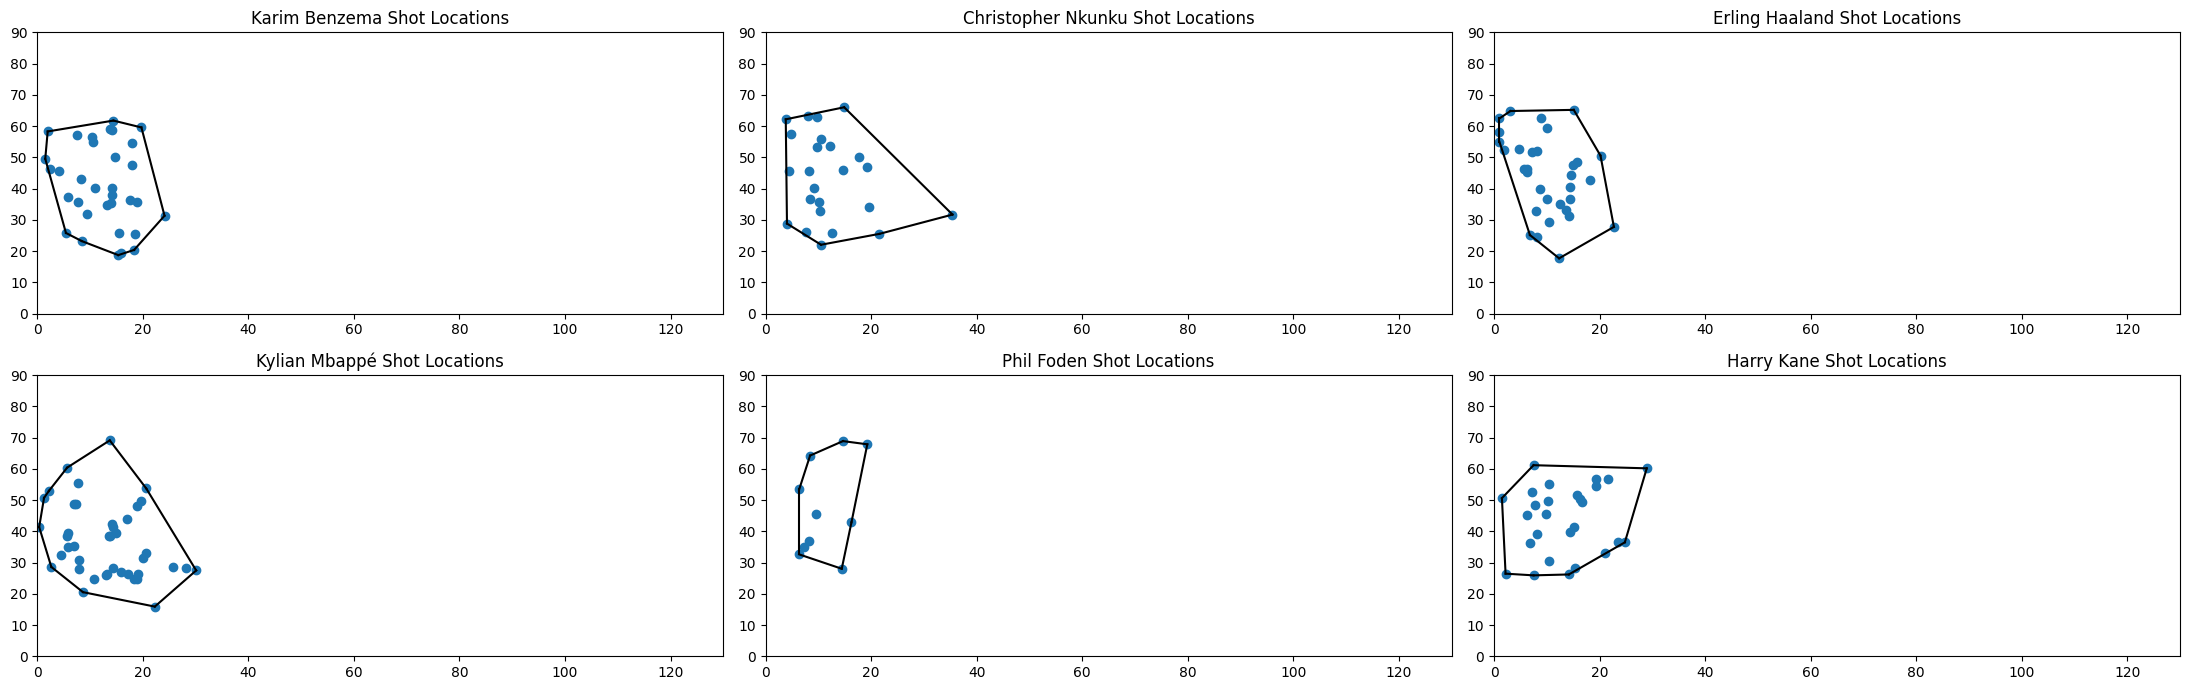

In [31]:
%matplotlib inline
from scipy.spatial import ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# List of players
players = ['Karim Benzema', 'Christopher Nkunku', 'Erling Haaland', 'Kylian Mbappé', 'Phil Foden', 'Harry Kane']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 7))

for idx, player in enumerate(players):
    # Fetch data and compute convex hull
    player_data = df[df['Player_Name'] == player]
    hull = ConvexHull(player_data[['Shot_X', 'Shot_Y']])
    
    # Get axes
    ax = axes[idx // 3, idx % 3]

    # Plot the data and the convex hull
    ax.plot(player_data['Shot_X'], player_data['Shot_Y'], 'o')
    for simplex in hull.simplices:
        ax.plot(player_data['Shot_X'].iloc[simplex], player_data['Shot_Y'].iloc[simplex], 'k-')
    
    # Set title and axis limits
    ax.set_title(f'{player} Shot Locations')
    ax.set_xlim(0, 130)
    ax.set_ylim(0, 90)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

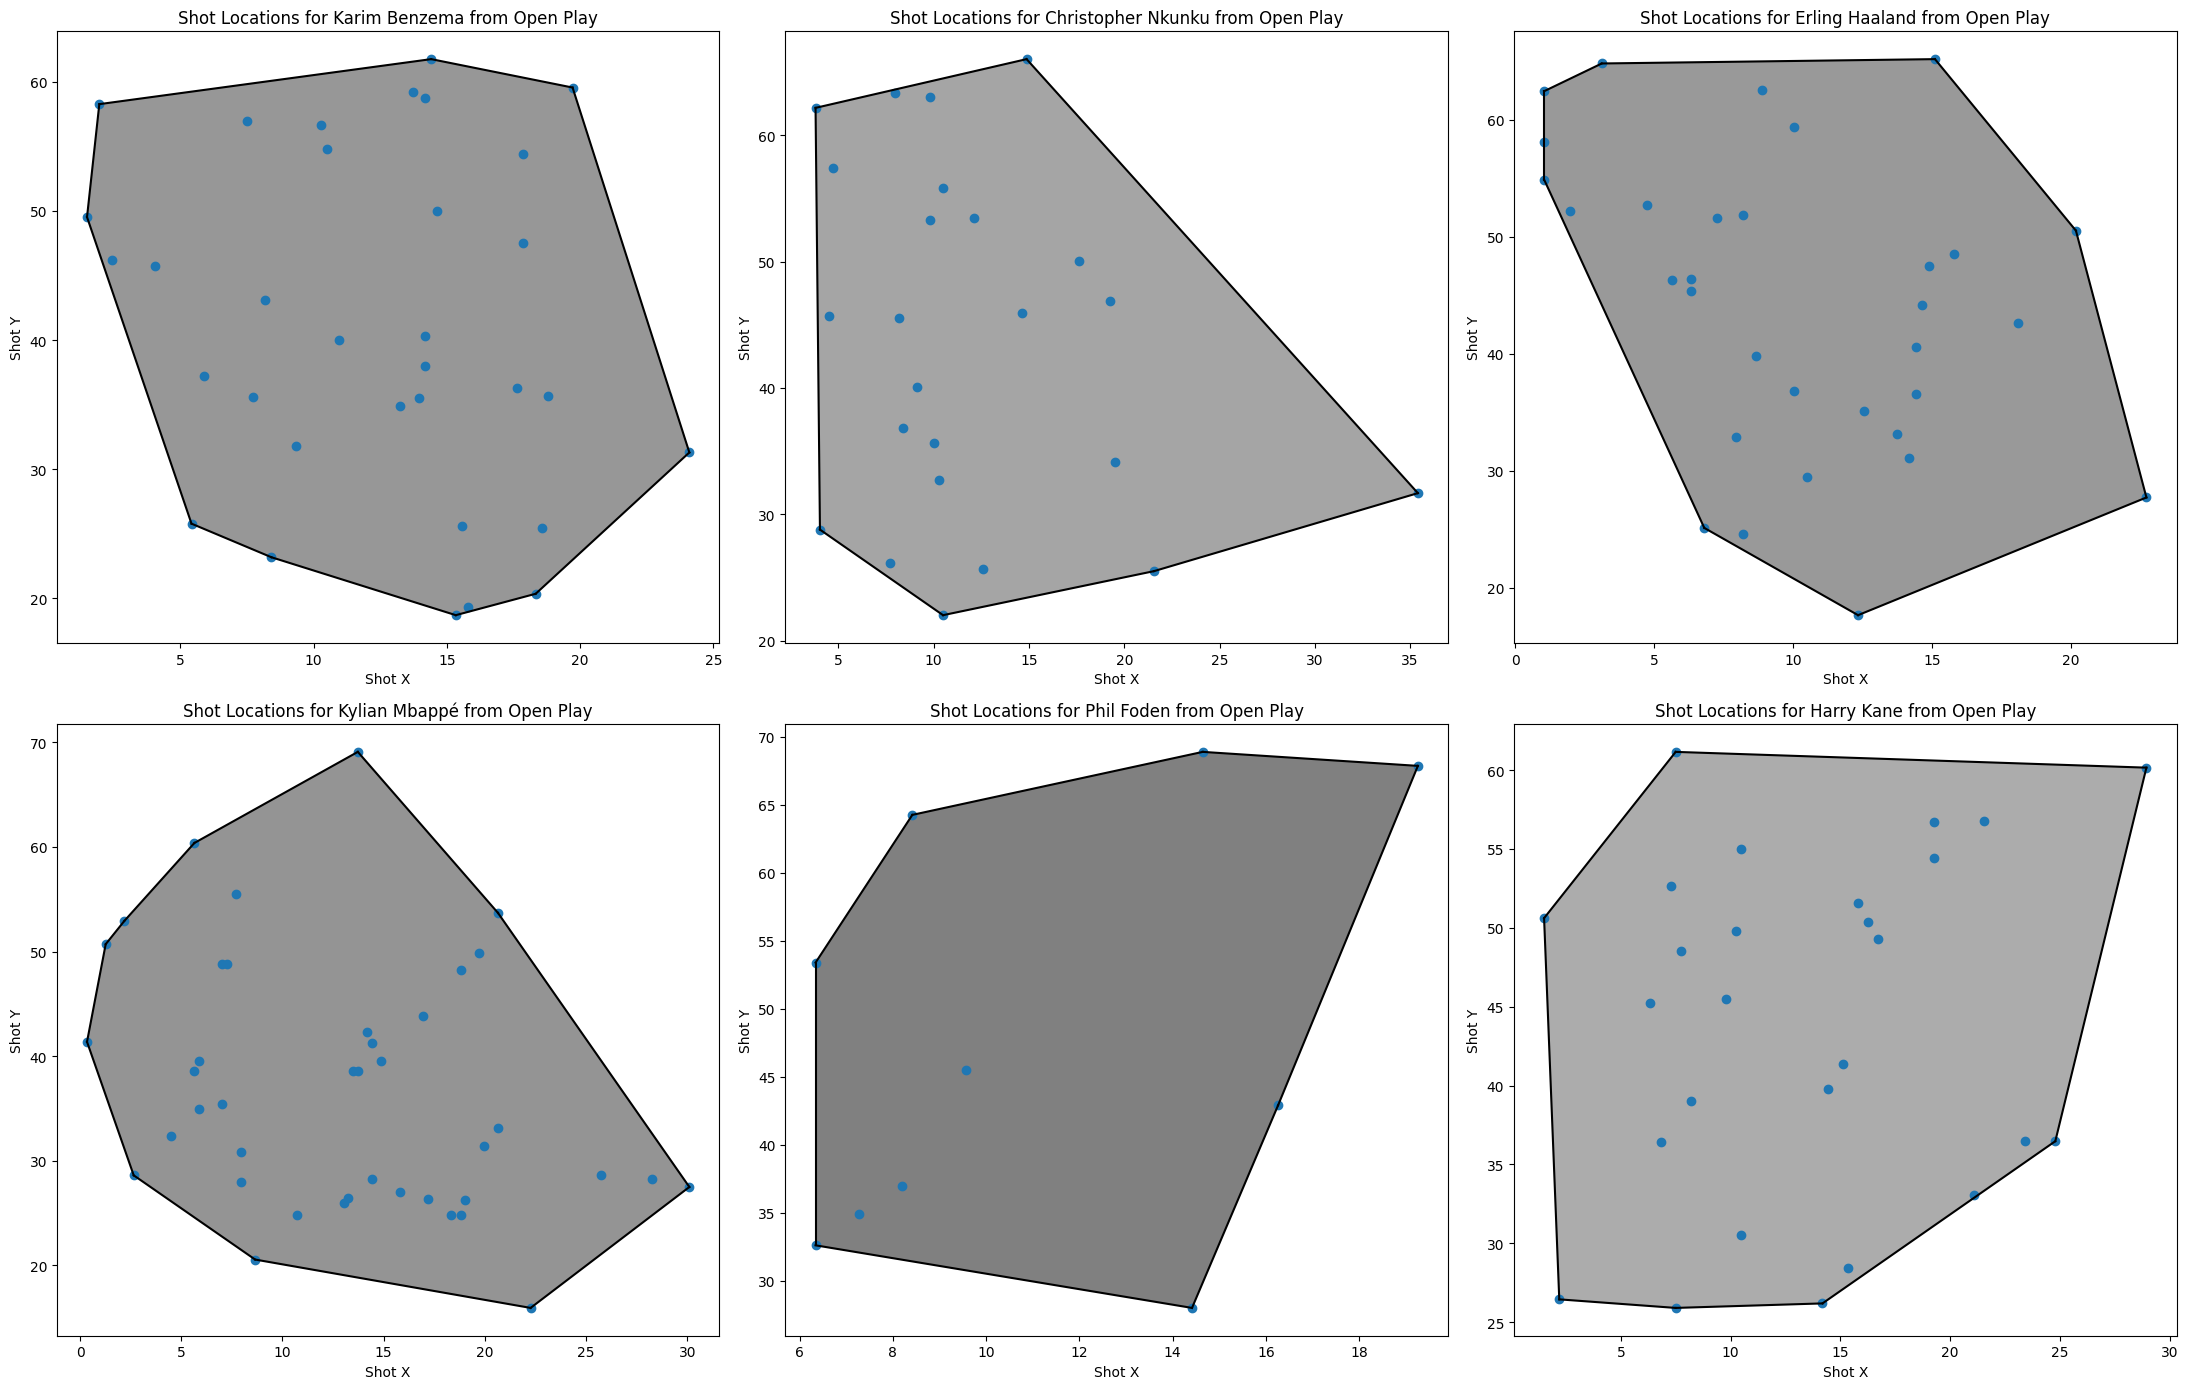

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Filter data for all six players
data_map = {
    'Karim Benzema': df.loc[df['Player_Name'] == 'Karim Benzema'],
    'Christopher Nkunku': df.loc[df['Player_Name'] == 'Christopher Nkunku'],
    'Erling Haaland': df.loc[df['Player_Name'] == 'Erling Haaland'],
    'Kylian Mbappé': df.loc[df['Player_Name'] == 'Kylian Mbappé'],
    'Phil Foden': df.loc[df['Player_Name'] == 'Phil Foden'],
    'Harry Kane': df.loc[df['Player_Name'] == 'Harry Kane']
}

# Compute the convex hull for each player
hull_map = {player: ConvexHull(data[['Shot_X', 'Shot_Y']]) for player, data in data_map.items()}

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 14))  # Adjusted for 6 players

for idx, (player, data) in enumerate(data_map.items()):
    ax = axes[idx//3, idx%3]
    
    ax.plot(data['Shot_X'], data['Shot_Y'], "o")
    for simplex in hull_map[player].simplices:
        ax.plot(data.iloc[simplex]['Shot_X'], data.iloc[simplex]['Shot_Y'], 'k-')
    
    transparency = stat_df[stat_df['Player_Name'] == player]['xGOT'].iloc[0] / stat_df[stat_df['Player_Name'] == player]['SoT'].iloc[0] if stat_df[stat_df['Player_Name'] == player]['SoT'].iloc[0] != 0 else 0
    ax.fill(data.iloc[hull_map[player].vertices]['Shot_X'], data.iloc[hull_map[player].vertices]['Shot_Y'], 'k', alpha=transparency)
    ax.set_title(f"Shot Locations for {player} from Open Play")
    ax.set_xlabel("Shot X")
    ax.set_ylabel("Shot Y")

plt.tight_layout()
plt.show()

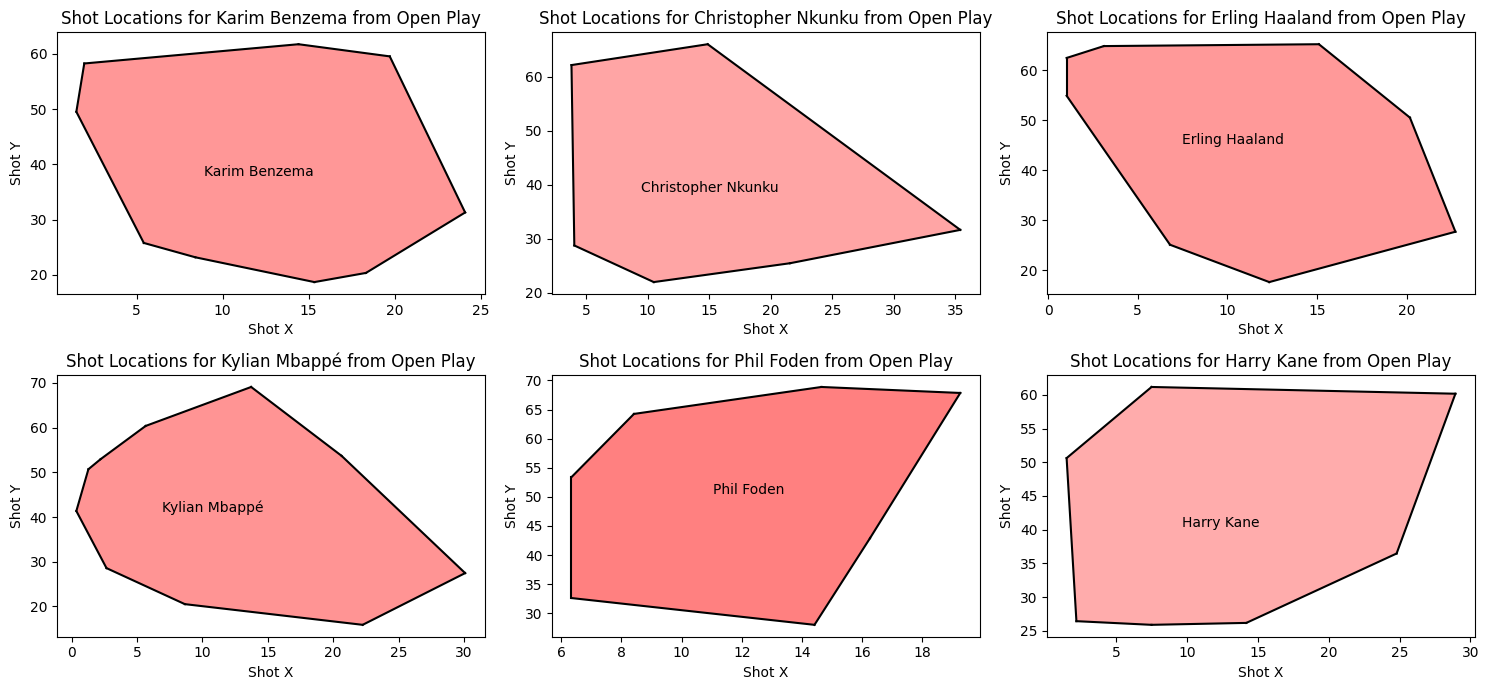

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull
import pandas as pd

# Load the aggregated data
stat_data = pd.read_csv('PlayerStatData.csv')

# Load the shot data
shots_data = pd.read_csv('PlayerShotsData.csv')

# List of players you want to visualize
players = ['Karim Benzema', 'Christopher Nkunku', 'Erling Haaland', 'Kylian Mbappé', 'Phil Foden', 'Harry Kane']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

for idx, Player in enumerate(players):
    ax = axes[idx // 3, idx % 3]
    player_data = shots_data[shots_data['Player_Name'] == Player]
    points = player_data[['Shot_X', 'Shot_Y']].values
    
    if len(points) >= 3:
        try:
            hull = ConvexHull(points)
            
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'k-')

            player_stat_data = stat_data[stat_data['Player_Name'] == Player]
            
            if player_stat_data['SoT'].iloc[0] != 0:
                transparency = min(player_stat_data['xGOT'].iloc[0] / player_stat_data['SoT'].iloc[0], 1)
            else:
                transparency = 0
                
            ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'red', alpha=transparency)
            
            cx = np.mean(points[hull.vertices, 0])
            cy = np.mean(points[hull.vertices, 1])
            
            ax.text(cx, cy, Player, color='black', ha='center', va='center')
            
        except:
            pass
        
    ax.set_title(f"Shot Locations for {Player} from Open Play")
    ax.set_xlabel("Shot X")
    ax.set_ylabel("Shot Y")

plt.tight_layout()
plt.show()

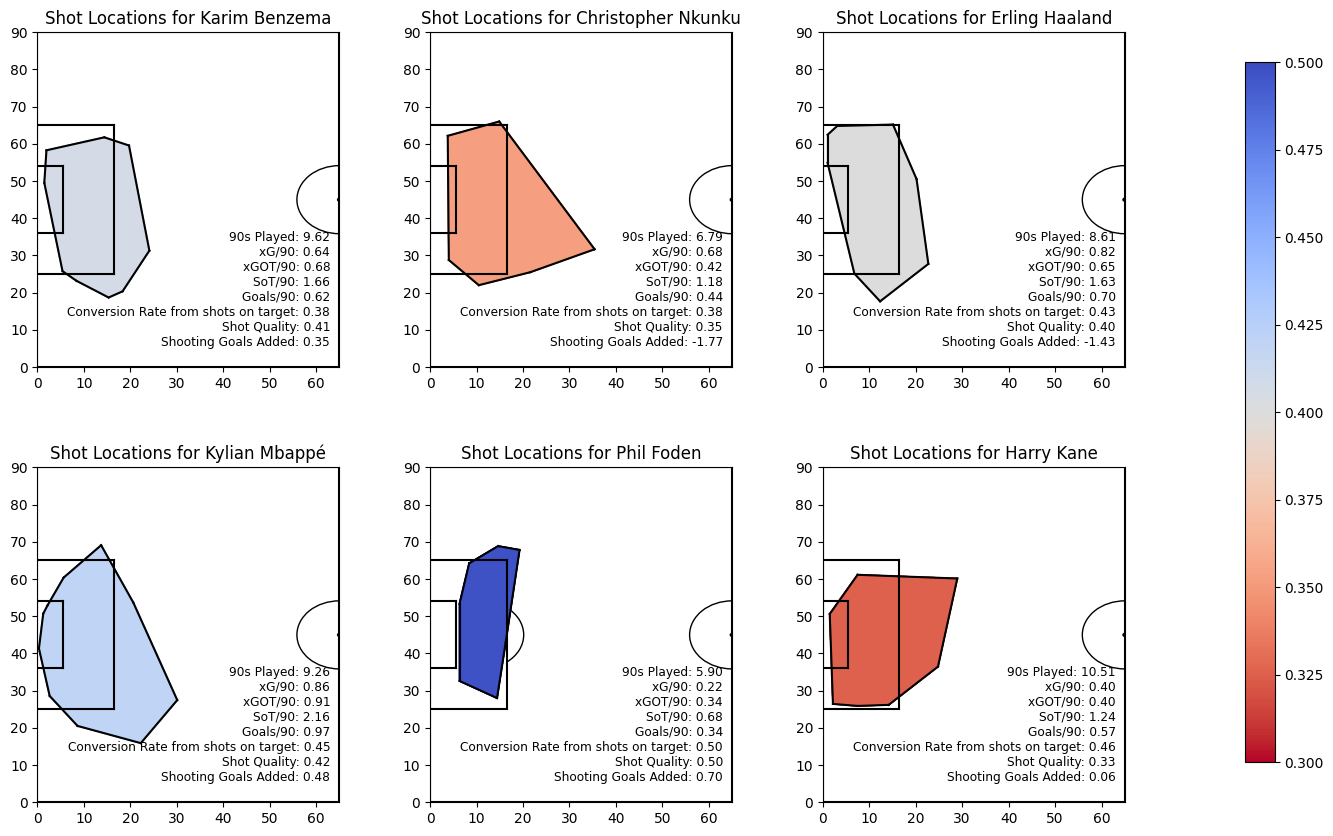

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Arc
import numpy as np
from scipy.spatial import ConvexHull
import pandas as pd

# Load the aggregated and shot data
shots_data = pd.read_csv('PlayerShotsData.csv')
stat_data = pd.read_csv('PlayerStatData.csv')  # Adjusted to a more generic filename

players = stat_data['Player_Name'].unique()

def createLeftHalfPitch(ax):
    # Pitch Outline & Centre Line
    ax.plot([0, 0], [0, 90], color="black")
    ax.plot([0, 65], [90, 90], color="black")
    ax.plot([65, 65], [90, 0], color="black")
    ax.plot([65, 0], [0, 0], color="black")
    
    # Left Penalty Area
    ax.plot([16.5, 16.5], [65, 25], color="black")
    ax.plot([0, 16.5], [65, 65], color="black")
    ax.plot([16.5, 0], [25, 25], color="black")
    
    # Left 6-yard Box
    ax.plot([0, 5.5], [54, 54], color="black")
    ax.plot([5.5, 5.5], [54, 36], color="black")
    ax.plot([5.5, 0], [36, 36], color="black")
    
    # Add the centre spot and left penalty spot
    centreSpot = plt.Circle((65, 45), 0.4, color="black")
    leftPenSpot = plt.Circle((11, 45), 0.4, color="black")
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    
    # Add left arc
    leftArc = Arc((11, 45), height=18.3, width=18.3, angle=0, theta1=307, theta2=53, color="black")
    ax.add_patch(leftArc)
    
    # Half Circle
    half_circle = Arc((65, 45), height=18.3, width=18.3, angle=0, theta1=90, theta2=270, color="black")
    ax.add_patch(half_circle)

# Initialize the colormap and normalization
cmap = plt.get_cmap("coolwarm").reversed()
norm = mcolors.Normalize(vmin=0.3, vmax=0.5)

# Retrieve unique players. Limit to a maximum of 3 for visualization clarity.
players = stat_data['Player_Name'].unique()

# Setting up the figure with a fixed 2x3 structure
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

def player_stats(player_row):
    minutes = player_row['Mins_Played']
    xG = player_row['xG']
    xGOT = player_row['xGOT']
    SoT = player_row['SoT']
    goals = player_row['Goal']

    mins_90 = minutes / 90
    xG_90 = xG / mins_90
    xGOT_90 = xGOT / mins_90
    SoT_90 = SoT / mins_90
    goals_90 = goals / mins_90
    conversion_rate = goals / SoT if SoT != 0 else 0
    shot_quality = xGOT / SoT if SoT != 0 else 0
    shooting_goals_added = xGOT - xG

    return {
        '90s Played': mins_90,
        'xG/90': xG_90,
        'xGOT/90': xGOT_90,
        'SoT/90': SoT_90,
        'Goals/90': goals_90,
        'Conversion Rate from shots on target': conversion_rate,
        'Shot Quality': shot_quality,
        'Shooting Goals Added': shooting_goals_added
    }


for idx, Player in enumerate(players):
    row = idx // 3
    col = idx % 3
    ax = axs[row, col]
    createLeftHalfPitch(ax)
    
        # Fetch player's row
    player_row = stat_data[stat_data['Player_Name'] == Player].iloc[0]
    stats = player_stats(player_row)
    
    # Format text to be displayed
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    
    # Add the stats text at the bottom right of every subplot.
    ax.text(63, 5, stats_text, ha='right', fontsize=8.75, color='black', verticalalignment='bottom')
    

    # Ensure the axes limits cover only the left half of the pitch
    ax.set_xlim(0, 65)
    ax.set_ylim(0, 90)
    
    player_data = shots_data[shots_data['Player_Name'] == Player].copy()
    points = player_data[['Shot_X', 'Shot_Y']].values

    if len(points) >= 3:  # Ensure there are enough points to compute a convex hull
        try:
            hull = ConvexHull(points)
            player_stat_data = stat_data[stat_data['Player_Name'] == Player]

            if player_stat_data['SoT'].iloc[0] != 0:
                value = player_stat_data['xGOT'].iloc[0] / player_stat_data['SoT'].iloc[0]
            else:
                value = 0

            value = max(0.3, min(value, 0.5))
            color = cmap(norm(value))

            for simplex in hull.simplices:
                ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], color=color, alpha=1)
                ax.plot(points[simplex, 0], points[simplex, 1], 'k-')

            ax.set_title(f"Shot Locations for {Player}")

        except:
            pass

# Add a single colorbar
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

plt.subplots_adjust(right=0.85, hspace=0.3, wspace=0.3)  # Adjust the plots to make space for the colorbar and between the pitches
plt.show()